In [1]:
# Import necessary modules and functions from other Python files in the project
from utils import (
    torch,  # PyTorch library
    is_cuda_available,  # Function to check if CUDA is available
    get_device,  # Function to get the device (CPU or GPU) to be used for training
    GetCorrectPredCount, # Function to get the number of correct predictions
    train,  # Function to train the model
    test,  # Function to test the model
    plot_losses,  # Function to plot the losses
)

from model import (
    nn,  # PyTorch's neural network module
    Net,  # Custom neural network model,
    F # PyTorch's functional module
)

from torchvision import datasets, transforms # Torchvision contains popular datasets, model architectures, and common image transformations for computer vision
import torch.optim as optim  # PyTorch's optimization module

In [2]:
print("CUDA Available?", is_cuda_available())
device = get_device()

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    # Randomly apply center crop of size 22 to the image with probability 0.1
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # Resize the image to size 28x28
    transforms.Resize((28, 28)),
    # Randomly rotate the image by an angle between -15 and 15 degrees
    transforms.RandomRotation((-15., 15.), fill=0),
    # Convert the image to a tensor
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation of MNIST dataset
    transforms.Normalize((0.1307,), (0.3081,))
])

# Test data transformations
test_transforms = transforms.Compose([
    # Convert the image to a tensor
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation of MNIST dataset
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
# Load the MNIST train and test datasets and apply the respective transformations
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 177146325.88it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 100029474.67it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 63513806.82it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 8730764.79it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:

# Set the batch size for the data loaders
batch_size = 512

# Set the data loader arguments
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Create the test and train data loaders
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

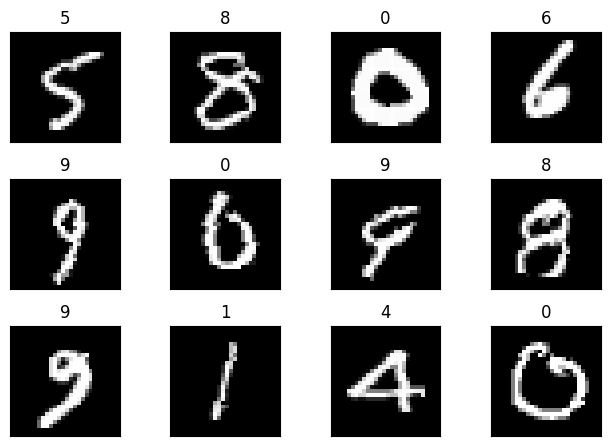

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [7]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 19

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8499 Batch_id=117 Accuracy=54.26: 100%|██████████| 118/118 [00:31<00:00,  3.73it/s]


Test set: Average loss: 0.6648, Accuracy: 8321/10000 (83.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2968 Batch_id=117 Accuracy=92.31: 100%|██████████| 118/118 [00:28<00:00,  4.13it/s]


Test set: Average loss: 0.1239, Accuracy: 9767/10000 (97.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2140 Batch_id=117 Accuracy=96.47: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]


Test set: Average loss: 0.0740, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0451 Batch_id=117 Accuracy=97.44: 100%|██████████| 118/118 [00:23<00:00,  4.92it/s]


Test set: Average loss: 0.0429, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0932 Batch_id=117 Accuracy=97.91: 100%|██████████| 118/118 [00:24<00:00,  4.81it/s]


Test set: Average loss: 0.0393, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1191 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]


Test set: Average loss: 0.0306, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0557 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0289, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0731 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0255, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0885 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0260, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0127 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0265, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1292 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:23<00:00,  5.00it/s]


Test set: Average loss: 0.0210, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1426 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0212, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0615 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0202, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.1239 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:25<00:00,  4.71it/s]


Test set: Average loss: 0.0203, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0498 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0199, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0336 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:24<00:00,  4.87it/s]


Test set: Average loss: 0.0202, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0118 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:25<00:00,  4.59it/s]


Test set: Average loss: 0.0199, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0700 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]


Test set: Average loss: 0.0198, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0240 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:24<00:00,  4.89it/s]


Test set: Average loss: 0.0198, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [8]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
            Conv2d-4           [-1, 16, 24, 24]           2,304
       BatchNorm2d-5           [-1, 16, 24, 24]              32
              ReLU-6           [-1, 16, 24, 24]               0
            Conv2d-7           [-1, 16, 22, 22]           2,304
       BatchNorm2d-8           [-1, 16, 22, 22]              32
              ReLU-9           [-1, 16, 22, 22]               0
        MaxPool2d-10           [-1, 16, 11, 11]               0
           Conv2d-11           [-1, 16, 11, 11]             256
      BatchNorm2d-12           [-1, 16, 11, 11]              32
             ReLU-13           [-1, 16, 11, 11]               0
          Dropout-14           [-1, 16,

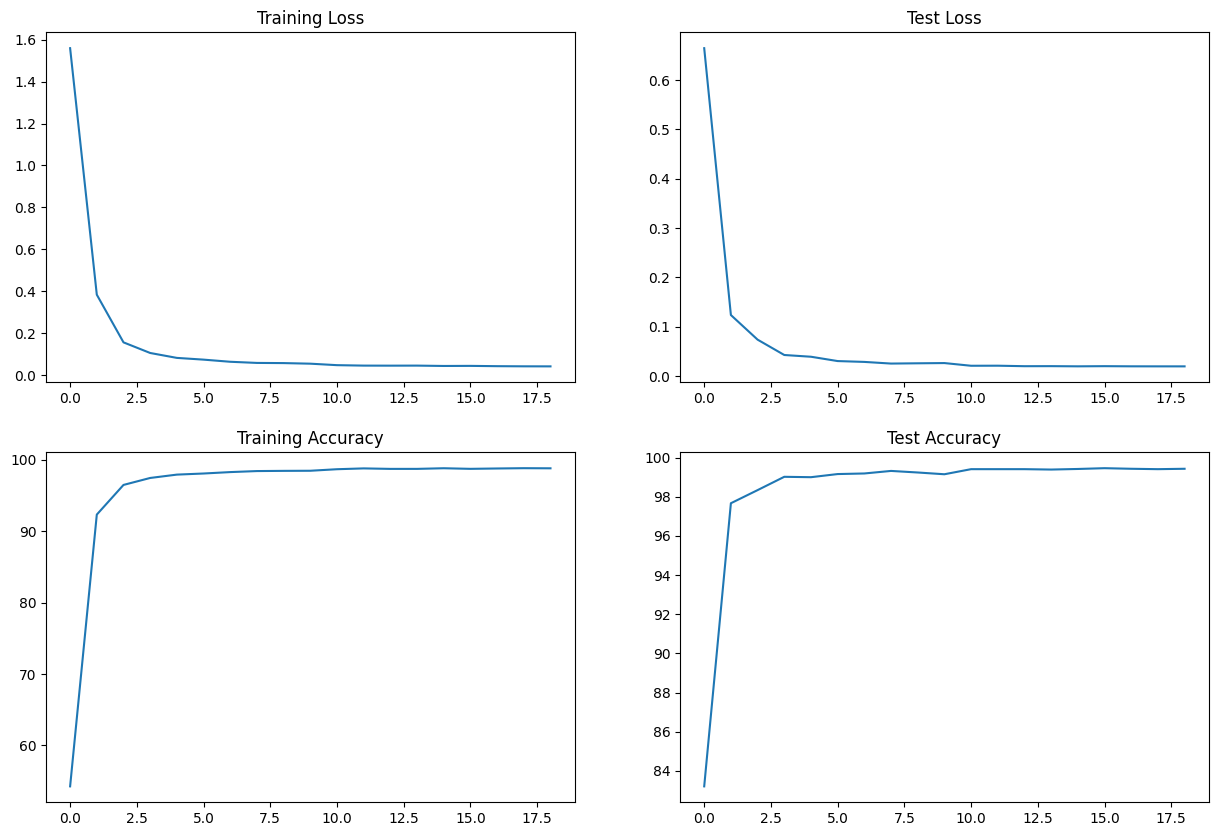

In [9]:
plot_losses()